# Cleaning Hotel Booking Dataset and deploying Classification model on it to find whether booking will be cancelled or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/priyanshugithub2003/Datasets_Data_Science/main/hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df['is_canceled'].sample(10)

98379     0
15402     0
50102     1
44797     1
25450     0
28730     0
66061     1
107144    0
8638      1
93532     0
Name: is_canceled, dtype: int64

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

company column is having so many null values so we will just drop the column. country column is of type object so we will replace null values with mode. agent and children column can be replaced either by mean or median.

In [8]:
df=df.drop('company',axis=1)

In [9]:
median1=df['children'].median()
df['children'].replace(np.nan,median1,inplace=True)
median1

0.0

In [10]:
median2=df['agent'].median()
df['agent'].replace(np.nan,median2,inplace=True)
median2

14.0

In [11]:
mode1=df['country'].mode().values[0]
mode1

'PRT'

In [12]:
df['country'].replace(np.nan,mode1,inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Handling Duplicate Records

In [14]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

32020


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,07-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,09-03-2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
dp1=df.duplicated()
dp1.sum()

0

In [17]:
df.shape

(87370, 31)

## Outliers

<AxesSubplot:>

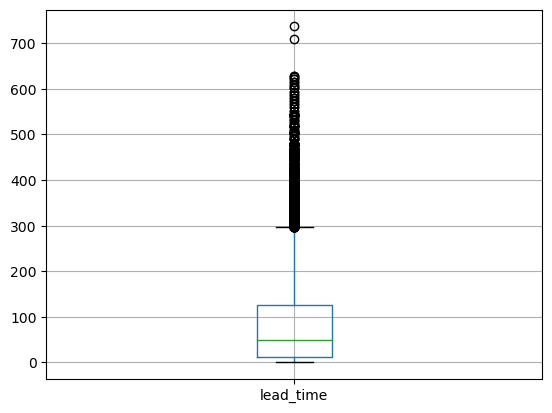

In [18]:
df.boxplot(column='lead_time')

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [20]:
low,up =remove_outlier(df['lead_time'])
df['lead_time']=np.where(df['lead_time']>up,up,df['lead_time'])
df['lead_time']=np.where(df['lead_time']<low,low,df['lead_time'])

In [21]:
df['lead_time'].shape

(87370,)

<AxesSubplot:>

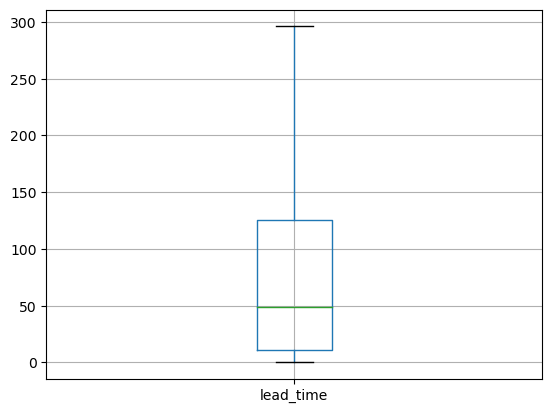

In [22]:
df.boxplot(column='lead_time')

## Normalizing and scaling 

Model will be biased towards highest valued numerical column. so standardisation and scaling is done.
It retuns the z-score(it gives us the idea of how far data is from the mean data point).
it's a measure of how many standard deviationsbelow or above the population mean a raw score is.

In [23]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler()

In [24]:
"""#df['is_canceled']=std_scale.fit_transform(df[['is_canceled']])
df['lead_time']=std_scale.fit_transform(df[['lead_time']])"""
#df['arrival_date_year']=std_scale.fit_transform(df[['arrival_date_year']])
"""df['arrival_date_week_number']=std_scale.fit_transform(df[['arrival_date_week_number']])
df['arrival_date_day_of_month']=std_scale.fit_transform(df[['arrival_date_day_of_month']])
df['stays_in_weekend_nights']=std_scale.fit_transform(df[['stays_in_weekend_nights']])
df['stays_in_week_nights']=std_scale.fit_transform(df[['stays_in_week_nights']])
df['adults']=std_scale.fit_transform(df[['adults']])
df['children']=std_scale.fit_transform(df[['children']])
df['babies']=std_scale.fit_transform(df[['babies']])
df['is_repeated_guest']=std_scale.fit_transform(df[['is_repeated_guest']])
df['previous_cancellations']=std_scale.fit_transform(df[['previous_cancellations']])
df['previous_bookings_not_canceled']=std_scale.fit_transform(df[['previous_bookings_not_canceled']])
df['booking_changes']=std_scale.fit_transform(df[['booking_changes']])
df['agent']=std_scale.fit_transform(df[['agent']])
df['days_in_waiting_list']=std_scale.fit_transform(df[['days_in_waiting_list']])
df['adr']=std_scale.fit_transform(df[['adr']])
df['required_car_parking_spaces']=std_scale.fit_transform(df[['required_car_parking_spaces']])
df['total_of_special_requests']=std_scale.fit_transform(df[['total_of_special_requests']])"""

"df['arrival_date_week_number']=std_scale.fit_transform(df[['arrival_date_week_number']])\ndf['arrival_date_day_of_month']=std_scale.fit_transform(df[['arrival_date_day_of_month']])\ndf['stays_in_weekend_nights']=std_scale.fit_transform(df[['stays_in_weekend_nights']])\ndf['stays_in_week_nights']=std_scale.fit_transform(df[['stays_in_week_nights']])\ndf['adults']=std_scale.fit_transform(df[['adults']])\ndf['children']=std_scale.fit_transform(df[['children']])\ndf['babies']=std_scale.fit_transform(df[['babies']])\ndf['is_repeated_guest']=std_scale.fit_transform(df[['is_repeated_guest']])\ndf['previous_cancellations']=std_scale.fit_transform(df[['previous_cancellations']])\ndf['previous_bookings_not_canceled']=std_scale.fit_transform(df[['previous_bookings_not_canceled']])\ndf['booking_changes']=std_scale.fit_transform(df[['booking_changes']])\ndf['agent']=std_scale.fit_transform(df[['agent']])\ndf['days_in_waiting_list']=std_scale.fit_transform(df[['days_in_waiting_list']])\ndf['adr']=s

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  float64
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                           

In [26]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46134,City Hotel,0,11.0,2015,December,51,13,2,1,1,...,0,No Deposit,7.0,0,Transient,62.37,0,1,Check-Out,12/16/2015
5893,Resort Hotel,0,213.0,2016,May,21,16,1,1,2,...,0,No Deposit,298.0,0,Transient-Party,87.00,0,0,Check-Out,5/18/2016
110001,City Hotel,0,151.0,2017,April,16,17,1,3,2,...,0,No Deposit,9.0,0,Transient,117.00,0,1,Check-Out,4/21/2017
7761,Resort Hotel,1,29.0,2016,August,35,25,0,3,2,...,0,No Deposit,240.0,0,Transient,214.00,0,0,Canceled,7/29/2016
44294,City Hotel,0,86.0,2015,October,40,3,2,1,2,...,0,No Deposit,1.0,0,Transient-Party,86.00,0,0,Check-Out,10-06-2015
14550,Resort Hotel,0,3.0,2016,November,49,28,1,1,1,...,0,No Deposit,14.0,0,Transient,33.00,1,0,Check-Out,11/30/2016
32005,Resort Hotel,0,0.0,2017,January,2,14,0,1,2,...,1,No Deposit,14.0,0,Transient,67.00,1,0,Check-Out,1/15/2017
33698,Resort Hotel,0,48.0,2017,February,9,28,0,1,2,...,0,No Deposit,241.0,0,Transient,49.74,0,1,Check-Out,03-01-2017
30050,Resort Hotel,0,35.0,2016,November,46,10,0,3,2,...,0,No Deposit,240.0,0,Transient,37.80,0,2,Check-Out,11/13/2016
14655,Resort Hotel,0,266.0,2015,September,39,24,2,4,1,...,0,No Deposit,201.0,0,Transient-Party,35.67,0,0,Check-Out,9/30/2015


min max scaler we will get range 0 to 1

In [27]:
# ONE HOT CODING
dummies=pd.get_dummies(df[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
                                   'deposit_type','customer_type','reservation_status','reservation_status_date']],
                       columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
                                   'deposit_type','customer_type','reservation_status','reservation_status_date'],drop_first=True)
#drop_first=True drops the first column for each splitted column like 
#hotel_CityHotel, arrival_date_month_April ... columns dropped

In [28]:
dummies.sample(10)

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
117514,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83768,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48149,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15767,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30849,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16439,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116881,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dummies.isnull().sum()

hotel_Resort Hotel                   0
arrival_date_month_August            0
arrival_date_month_December          0
arrival_date_month_February          0
arrival_date_month_January           0
                                    ..
reservation_status_date_9/28/2016    0
reservation_status_date_9/29/2015    0
reservation_status_date_9/29/2016    0
reservation_status_date_9/30/2015    0
reservation_status_date_9/30/2016    0
Length: 1155, dtype: int64

In [30]:
columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
                                   'deposit_type','customer_type','reservation_status','reservation_status_date']
df=pd.concat([dummies,df],axis=1)# concatenates both the dataframes
df.drop(columns,axis=1,inplace=True)# old columns are replaced by new bifurcated columns so drop old

In [31]:
df['is_canceled'].sample(10)

104936    0
101193    0
104578    0
97122     0
116245    0
89998     0
14231     1
91291     0
65121     1
27501     0
Name: is_canceled, dtype: int64

In [32]:
x=df.drop(['is_canceled'],axis=1)
y=df[['is_canceled']]

In [33]:
y['is_canceled'].shape

(87370,)

In [34]:
y.shape

(87370, 1)

In [35]:
y=y.values.flatten()

In [36]:
y.shape

(87370,)

In [37]:
x.shape

(87370, 1173)

In [38]:
#x = std_scale.fit_transform(x)
#x = pd.DataFrame(x)

In [39]:
x.sample(10)

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
101501,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,7.0,0,118.07,0,1
106545,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,30.0,0,84.00,1,1
85324,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,9.0,0,67.50,0,0
90284,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,9.0,0,185.85,0,2
86817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9.0,0,98.00,0,0
1913,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,208.0,0,90.00,0,0
2464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,243.0,0,42.50,0,0
108461,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,9.0,0,102.73,0,0
42584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13.0,0,118.80,0,0
5771,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,250.0,0,130.00,0,0


In [40]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [41]:
df.dtypes

hotel_Resort Hotel                      uint8
arrival_date_month_August               uint8
arrival_date_month_December             uint8
arrival_date_month_February             uint8
arrival_date_month_January              uint8
arrival_date_month_July                 uint8
arrival_date_month_June                 uint8
arrival_date_month_March                uint8
arrival_date_month_May                  uint8
arrival_date_month_November             uint8
arrival_date_month_October              uint8
arrival_date_month_September            uint8
meal_FB                                 uint8
meal_HB                                 uint8
meal_SC                                 uint8
meal_Undefined                          uint8
country_AGO                             uint8
country_AIA                             uint8
country_ALB                             uint8
country_AND                             uint8
country_ARE                             uint8
country_ARG                       

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [43]:
reg_model=LogisticRegression()
reg_model.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
reg_model.score(x_train,y_train)

0.9645187135172256

In [45]:
reg_model.score(x_test,y_test)

0.9658921826713975

In [46]:
predictions = reg_model.predict(x_test)

In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(y_test,predictions)

0.9658921826713975

In [49]:
print(metrics.classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19238
           1       0.93      0.95      0.94      6973

    accuracy                           0.97     26211
   macro avg       0.95      0.96      0.96     26211
weighted avg       0.97      0.97      0.97     26211



<AxesSubplot:>

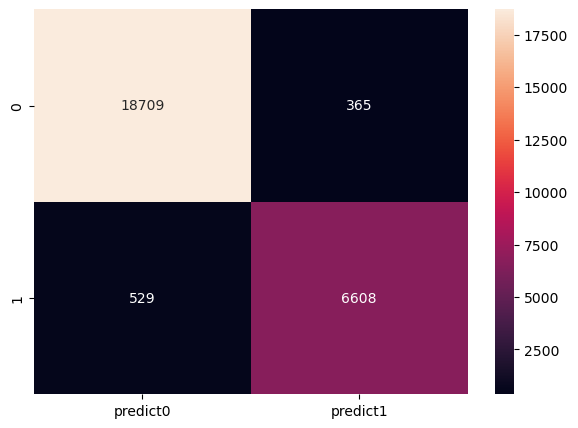

In [50]:
cm = metrics.confusion_matrix(y_test,predictions)
df1 = pd.DataFrame(cm, index=[i for i in ['0','1']],columns=[i for i in ['predict0','predict1']])
plt.figure(figsize=(7,5))
sns.heatmap(df1,annot=True,fmt='g')

# Ensemble Learning - Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
bgcl = BaggingClassifier(n_estimators=25,max_samples=3)
bgcl.fit(x_train,y_train)

BaggingClassifier(max_samples=3, n_estimators=25)

In [53]:
bgcl.score(x_train,y_train)

0.7238836475416537

In [54]:
bgcl.score(x_test,y_test)

0.7277097401854183